    Neural Network
    Stock Data -> Preprocessing -> LSTM(long Short Term Memory) Model ->Training ->Testing

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [7]:
start = '2015-01-01'
end = '2025-06-28'

stock = 'XRP-USD'
data = yf.download(stock,start,end)

/tmp/ipython-input-7-2054998434.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(stock,start,end)
[*********************100%***********************]  1 of 1 completed


In [10]:
data.reset_index(inplace=True)
data

Price,index,Date,Close,High,Low,Open,Volume
Ticker,,,XRP-USD,XRP-USD,XRP-USD,XRP-USD,XRP-USD
0,0,2017-11-09,0.217488,0.221791,0.214866,0.217911,147916992
1,1,2017-11-10,0.206483,0.219068,0.205260,0.218256,141032992
2,2,2017-11-11,0.210430,0.214456,0.205459,0.205948,134503008
3,3,2017-11-12,0.197339,0.210214,0.195389,0.210214,251175008
4,4,2017-11-13,0.203442,0.204081,0.197456,0.197472,132567000
...,...,...,...,...,...,...,...
2783,2783,2025-06-23,2.166309,2.168556,1.967336,2.014104,4568812691
2784,2784,2025-06-24,2.190816,2.216028,2.134337,2.166309,3574001224
2785,2785,2025-06-25,2.185872,2.225638,2.172663,2.190811,2632853074


Moveing avg of 100 and 200 days to draw the chart

In [12]:
moveing_avg_100_days = data.Close.rolling(100).mean()

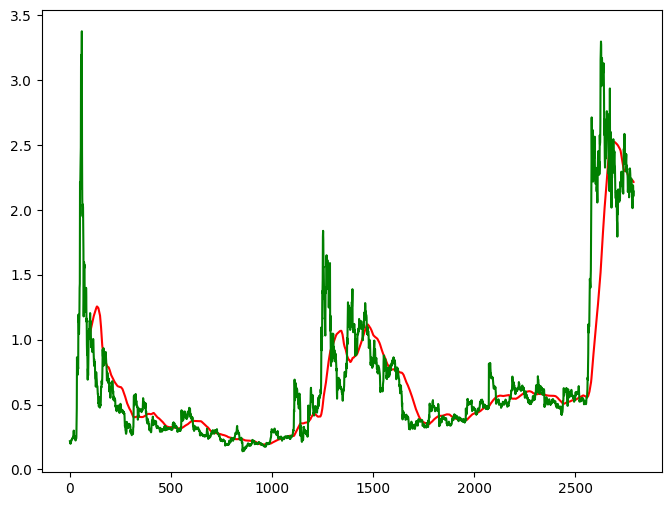

In [16]:
plt.figure(figsize=(8,6))
plt.plot(moveing_avg_100_days , 'r')
plt.plot(data.Close,'g')
plt.show()

In [18]:
moveing_avg_200_days = data.Close.rolling(200).mean()

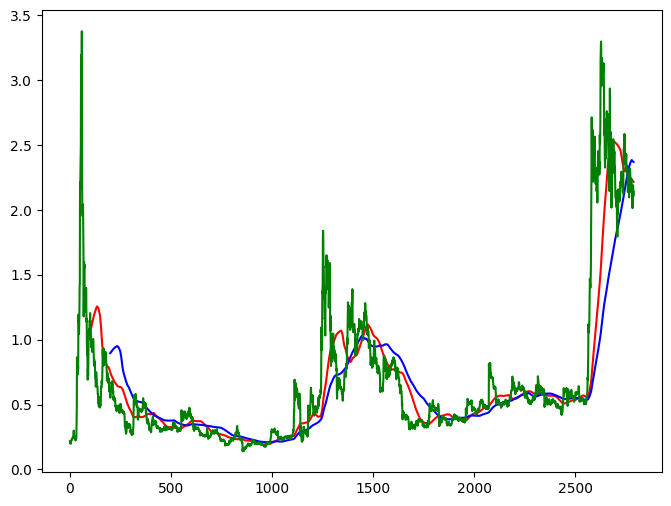

In [20]:
plt.figure(figsize=(8,6))
plt.plot(moveing_avg_100_days , 'r')
plt.plot(moveing_avg_200_days , 'b')
plt.plot(data.Close,'g')
plt.show()

In [21]:
data.dropna(inplace=True) #remove null values

In [31]:
data_train = pd.DataFrame(data.Close[0: int(len(data) * 0.80)])
data_test = pd.DataFrame(data.Close[int(len(data) *0.80): len(data)])

In [32]:
data_train.shape[0]

2230

In [33]:
data_test.shape[0]

558

In [34]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [35]:
data_training_array = scaler.fit_transform(data_train)

In [37]:
x = []
y = []
for i in range (100 , data_training_array.shape[0]):
    x.append(data_training_array[i-100:i])
    y.append(data_training_array[i,0])

In [43]:
x,y = np.array(x),np.array(y)

In [44]:
from keras.layers import Dense , Dropout , LSTM
from keras.models import Sequential

In [45]:
model = Sequential()
#unite = 50 means 50,60  neurons in the lstm layer , AF = 'relu ' neural network parameter , return_sequences =
# means output of one layer will becomes the input of another layer

model.add(LSTM(units=50 , activation = 'relu' ,  return_sequences=True , input_shape=(x.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60 , activation = 'relu' ,  return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80 , activation = 'relu' ,  return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120 , activation = 'relu'))
model.add(Dropout(0.5))
# dense = 1 bcz we are predicting only closing price of the stocks
model.add(Dense(units=1))


In [47]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x,y,epochs=50, batch_size=32 , verbose=1)

Epoch 1/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 31s 325ms/step - loss: 0.0027
Epoch 2/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 20s 304ms/step - loss: 0.0019
Epoch 3/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 22s 330ms/step - loss: 0.0015
Epoch 4/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 41s 322ms/step - loss: 0.0015
Epoch 5/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 24s 351ms/step - loss: 0.0015
Epoch 6/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 40s 328ms/step - loss: 0.0012
Epoch 7/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 22s 329ms/step - loss: 0.0011
Epoch 8/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 41s 327ms/step - loss: 0.0011
Epoch 9/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 40s 307ms/step - loss: 9.1096e-04
Epoch 10/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 43s 340ms/step - loss: 8.3589e-04
Epoch 11/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 43s 366ms/step - loss: 0.0011
Epoch 12/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 40s 358ms/step - loss: 9.7213e-04
Epoch 13/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 41s 348ms/step - loss: 9.2148e-04
Epoch 14/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 39s 326ms/step - loss: 0.0010
Epoch 15/50
67/67 ━━━━━━━━━

In [48]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [49]:
past_100_days = data_train.tail()

In [50]:
data_test = pd.concat([past_100_days,data_test], ignore_index=True)

In [52]:
data_test_scale = scaler.fit_transform(data_test)

In [56]:
x = []
y = []
for i in range (100 , data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])


In [57]:
y_predict = model.predict(np.array(x))

15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step


In [61]:
scale = 1/scaler.scale_

array([2.87881202])

In [62]:
y_predict = y_predict*scale

In [63]:
y = y*scale

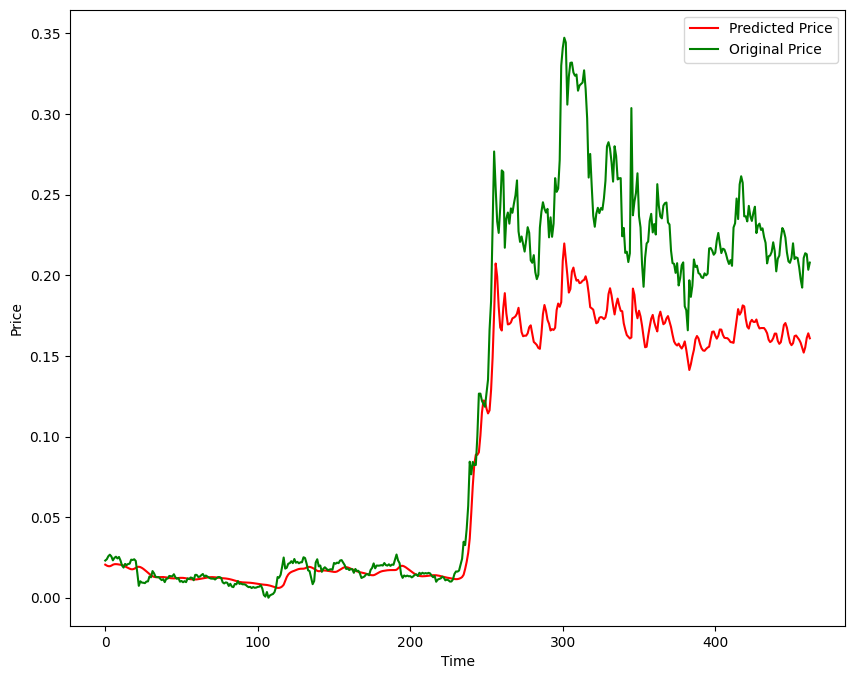

In [66]:
plt.figure(figsize=(10,8))
plt.plot(y_predict , 'r' ,label = 'Predicted Price')
plt.plot(y , 'g' ,label= 'Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [67]:
model.save('Stock Prediction Model.keras')